### **SENTIMENT ANALYSIS ON SOCIAL MEDIA**



# import modul libraries

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from IPython.display import Markdown, display
import seaborn as sns
import re                 # Regular Expression for finding / replacing particular phrases
import string             # For preprocessing 
import nltk               # natural language processing toolkit
 
 


# **# Loading Dataset**


In [3]:
df = pd.read_csv('/content/Twitter Sentiments.csv')
df.head()
#tweets with 0 specify are positive and 1 are denoted as negative

,id,specify,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [218]:
#The info() method is useful to get a quick description of the data, in particular
# the total number of rows, each attribute’s type, and the number of nonnull values
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       31962 non-null  int64 
 1   specify  31962 non-null  int64 
 2   tweet    31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


All attributes are numerical, except the tweet field. Its type is
object, so it could hold text attribute.



In [219]:
#You can find out what categories exist and how many
# types belong to each category by using the value_counts() method:
df['specify'].value_counts()

0    29720
1     2242
Name: specify, dtype: int64

In [220]:
#The describe() method shows a summary of the numerical attributes
df.describe()

,id,specify
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


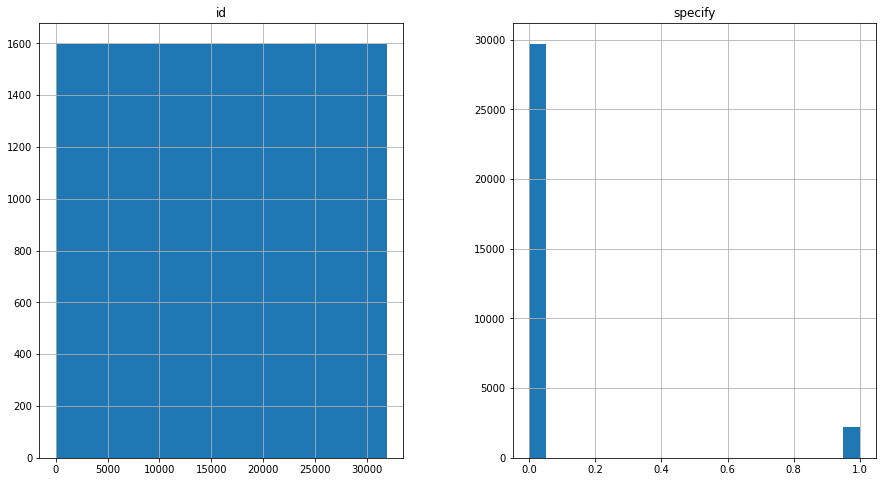

In [4]:
#A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal
#axis). You can either plot this one attribute at a time, or you can call the hist() method on the whole dataset
# (as shown in the following code example), and it will plot a histogram for each numerical attribute
df.hist(bins=20, figsize=(15,8))
plt.show()

# **Preprocessing the Data**


In [5]:
#preprocessing the tweets

#cleaning @mention , # - hashtag symbol , hyperlinks from our csv file.
#for that we make a function 
def cleandata(lines):
  lines = re.sub(r'@[A-Za-z0=9]+','',lines)
  lines = re.sub(r'RT[\s]+', '', lines)
  lines = re.sub(r'https?:\/\/\S+', '', lines)

  return lines

 


In [6]:
 df['processedtweet']=  df['tweet'].apply(cleandata) 

In [7]:
#since we have a text data for preprocessing, we use the tokenizer to split each word and put an ID to them.
tokenized = df['processedtweet'].apply(lambda x: x.split())
tokenized.head()

0    [when, a, father, is, dysfunctional, and, is, ...
1    [thanks, for, #lyft, credit, i, can't, use, ca...
2                              [bihday, your, majesty]
3    [#model, i, love, u, take, with, u, all, the, ...
4             [factsguide:, society, now, #motivation]
Name: processedtweet, dtype: object

In [8]:
#Stemming is Text Normalization (or sometimes called Word Normalization) 
#techniques in the field of Natural Language Processing that are used to
# prepare text, words, and documents for further processing. 

# possiblly same words will be processed as one word so that we have a sharp and accurate analysis using stemmer.
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized = tokenized.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized.head()

0    [when, a, father, is, dysfunct, and, is, so, s...
1    [thank, for, #lyft, credit, i, can't, use, cau...
2                              [bihday, your, majesti]
3    [#model, i, love, u, take, with, u, all, the, ...
4                  [factsguide:, societi, now, #motiv]
Name: processedtweet, dtype: object

In [9]:
# after the stemmer process we again combine words into single sentence for next steps.
for i in range(len(tokenized)):
    tokenized[i] = " ".join(tokenized[i])
    
df['processedtweet'] = tokenized
df.head()

,id,specify,tweet,processedtweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunct and is so selfish he...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank for #lyft credit i can't use caus they d...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: societi now #motiv


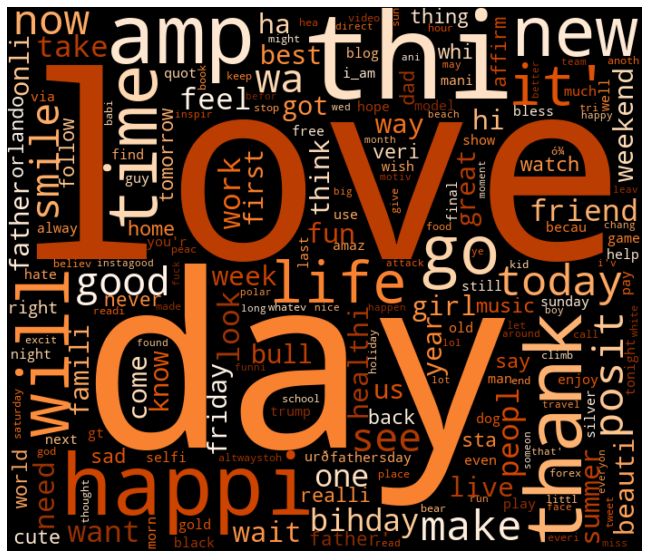

In [12]:
# using wordCloud or tagcloud technique we can visualize the most used in our data.
from wordcloud import WordCloud
total_tweets = " ".join([sentence for sentence in df['processedtweet']])

wordcloud = WordCloud(background_color="black", width = 700,height = 600, collocations=False, colormap="Oranges").generate(total_tweets)

# plot the graph
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

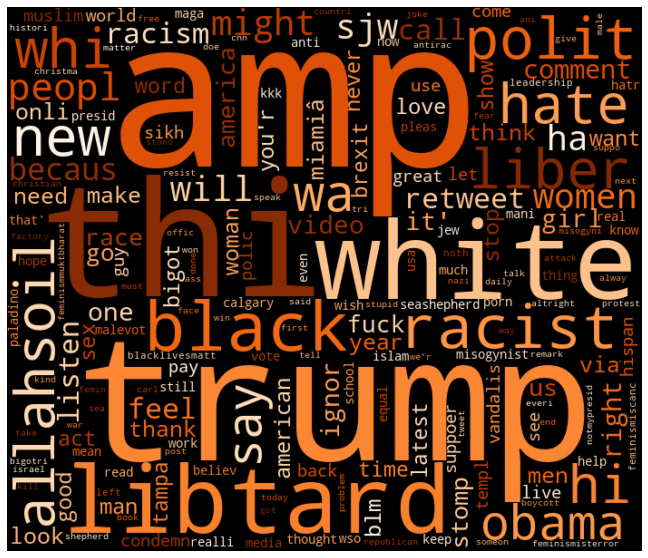

In [13]:
# our data was already split to 0 and 1. where 1 refers to negative tweets. now we visualize negative tweets from all the data.
negative_words = ' '.join(list (df [df ['specify'] == 1]['processedtweet']))
negative_wc = WordCloud(background_color="black", width = 700,height = 600, collocations=False, colormap="Oranges").generate(negative_words)
plt.figure(figsize=(20,10))
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

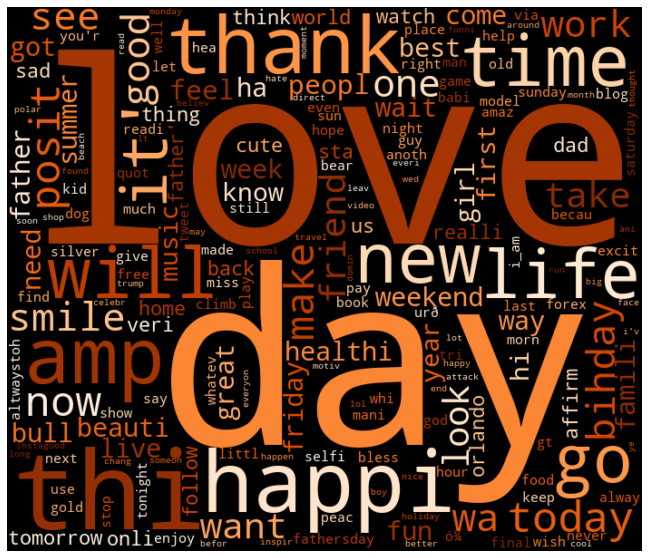

In [14]:
#positive words are specified as 0 . we visualize it them as we did with negative words
positive_words = ' '.join(list (df [df['specify'] == 0]['processedtweet']))
positive_wc = WordCloud(background_color="black", width = 700,height = 600, collocations=False, colormap="Oranges").generate(positive_words)
plt.figure(figsize=(20,10))
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

processing the data by ( hashtag #). now lets check which hashtag has been used the most.

In [15]:
# extract the hashtag
def h_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [18]:
# extract hashtags from negative tweets
negative_hashtags = h_extract(df['processedtweet'][df['specify']==1])

# extract hashtags from positive tweets
positive_hashtags = h_extract(df['processedtweet'][df['specify']==0])



In [19]:
positive_hashtags[:10]

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 ['gr8']]

In [20]:
negative_hashtags[:10]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'medâ'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist']]

In [21]:
#combining all the tweets into single list.
negative_hashtags = sum(negative_hashtags, [])
positive_hashtags = sum(positive_hashtags, [])


In [22]:
#frequency distriution has been used here to record the number of times each hashtag has been used within the data.
freq = nltk.FreqDist(positive_hashtags)
d = pd.DataFrame({'Hashtag': list (freq.keys()),
                 'Count': list (freq.values())})
d.head()

,Hashtag,Count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374


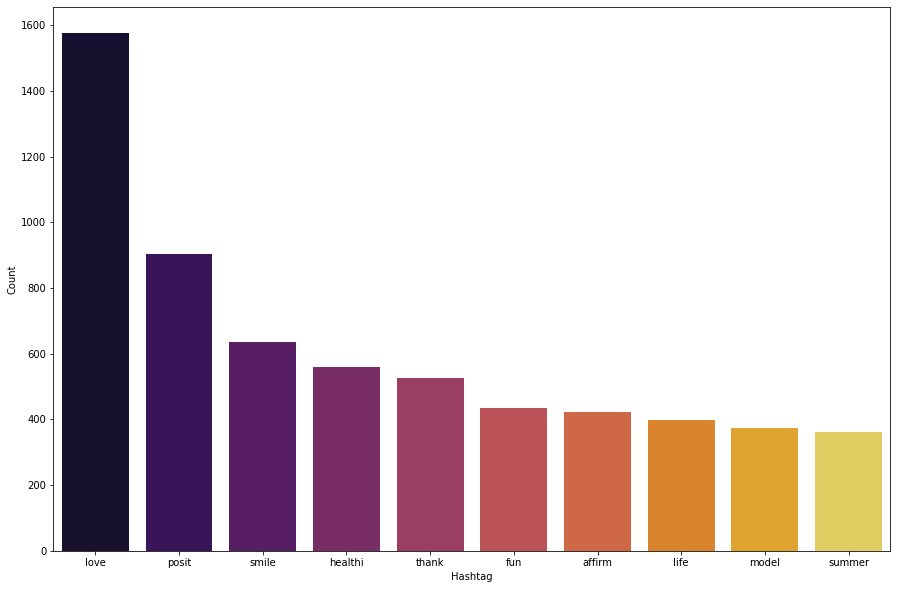

In [23]:
# select top 10 positive hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,10))
sns.barplot(data=d, y='Count', x='Hashtag', palette="inferno")
plt.show()

In [24]:

freq = nltk.FreqDist(negative_hashtags)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2


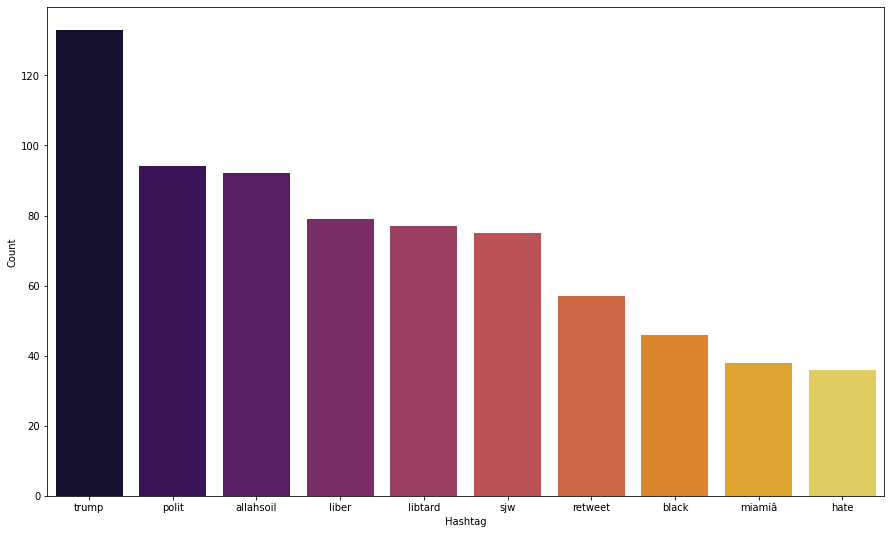

In [25]:
# select top 10 negative hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count', palette="inferno")
plt.show()

# TRAINGING THE MODEL

we have used the logistic regression for our classifaction and model training. since logistic regression works with binary values it was the optimal model we should use in our model.

In [37]:

# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=10000, stop_words='english')
arc = vectorizer.fit_transform(df['processedtweet'])


In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(arc, df['specify'], random_state=42, test_size=0.25)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import balanced_accuracy_score, average_precision_score
from sklearn.metrics import confusion_matrix

In [29]:
# training
log_Reg = LogisticRegression()
log_Reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:

# testing the data , since it based on 0 , 1 we use f1_score 
pred = log_Reg.predict(x_test)
f1_score(y_test, pred)


0.6237513873473918

In [31]:
accuracy_score(y_test,pred)

0.957577274433738

In [32]:
# use probability to get output. if the probability is more than 30% we will select it as 1.
pred_prob = log_Reg.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)   #converting to integer.
#now the f1_scores changes from the previous one. having more accuracy than before
f1_score(y_test, pred)

0.686159844054581

In [33]:
pred_prob[0][1] >= 0.3

False

In [34]:
pred_prob[0][1] >= 0.0

True

In [35]:
balanced_accuracy_score(y_test,pred)

0.8071111289766633

In [36]:
average_precision_score(y_test,pred)

0.5005357303814788

In [41]:
confusion_matrix(y_test,pred)

array([[7317,  115],
       [ 207,  352]])